# Loading of the Data

In [2]:
import pandas as pd
df=pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Analyzing the DAta

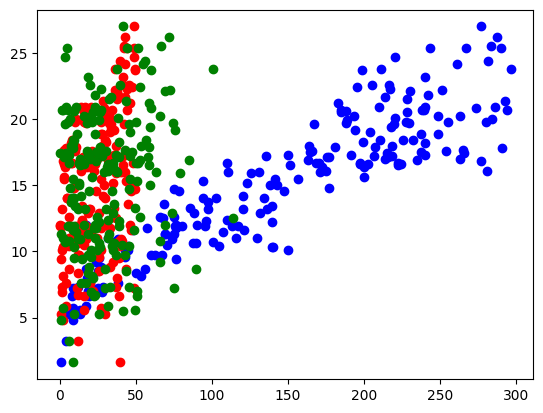

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(df.TV, df.Sales, color='blue')
plt.scatter(df.Radio, df.Sales, color='Red')
plt.scatter(df.Newspaper, df.Sales, color='Green')

In [7]:
# From the above graph it is clearly visible that the advertisement through TV is affecting the sales much more.
# Maximum variation is caused by TV

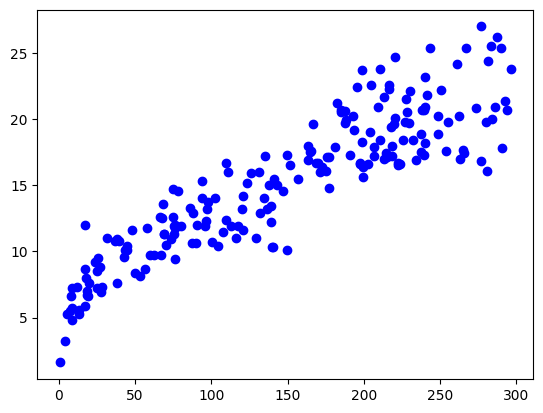

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(df.TV, df.Sales, color='blue')

In [9]:
x = df.drop(['Sales','Radio','Newspaper'], axis='columns')
x

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [10]:
y=df.Sales
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

# Training and Testing of data

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2)

In [12]:
(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

((160, 1), (40, 1), (160,), (40,))

In [13]:
from sklearn import linear_model
lasso_reg=linear_model.Lasso(alpha= 50, max_iter= 100, tol= 0.1)
lasso_reg.fit(x_train,y_train)
(lasso_reg.score(x_test,y_test),lasso_reg.score(x_train,y_train))

(0.7721552138108867, 0.8035468881354152)

In [14]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.7793522094451131

In [15]:
y_pred= lr.predict(x_test)
y_pred

array([13.56690753, 14.20822482, 18.55245238, 16.94637082, 15.98160654,
       22.90225662, 15.59681617,  7.82293526, 13.87362449,  7.90658535,
       10.80087816, 19.8072036 , 20.25333737, 19.94104373, 20.208724  ,
       20.34256413, 16.66196054,  7.59429171, 19.69567016, 12.69694668,
       23.19782024, 19.04319953, 11.33623869, 17.52076804, 12.98693363,
       18.29592547, 11.12432515, 11.64295565, 12.46272645, 21.52481861,
       17.66576152, 17.95574847, 16.35524358, 14.74358534, 13.03712368,
       22.71822644,  8.29137572, 19.45587326, 16.09871666, 20.1473806 ])

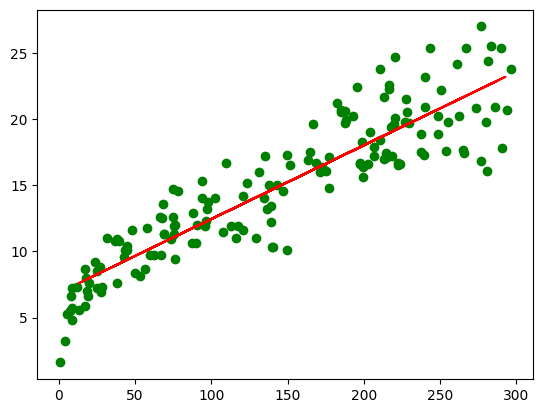

In [16]:
plt.scatter(x_train, y_train, color='g')
plt.plot(x_test, y_pred, color='r')

# Advertising through TV has proved more beneficial as compared to other sources as it has lead to the growth of sales
# So, the company can focus on television advertisement to make good amount of sales